# Import the libraries

In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

- The '%matplotlib inline' is a notebook magic for the plots to be saved with the notebook

In [2]:
path = "../Data/"
filename = path + "higgs_small.root"

- Now we will open a ROOT file containing signal and background Higgs events  

In [3]:
rt_file = uproot.open(filename)

We can see the trees in the file with:

In [4]:
rt_file.keys()

[b'TreeS;1', b'TreeB;1']

Let's print the branches of each tree

In [5]:
# TBranches of TTrees are also presented as dicts.
for tree in rt_file.keys():
    print(rt_file[tree].keys())

[b'lepton_pT', b'lepton_eta', b'lepton_phi', b'missing_energy_magnitude', b'missing_energy_phi', b'jet_1_pt', b'jet_1_eta', b'jet_1_phi', b'jet_1_b_tag', b'jet_2_pt', b'jet_2_eta', b'jet_2_phi', b'jet_2_b_tag', b'jet_3_pt', b'jet_3_eta', b'jet_3_phi', b'jet_3_b_tag', b'jet_4_pt', b'jet_4_eta', b'jet_4_phi', b'jet_4_b_tag', b'm_jj', b'm_jjj', b'm_lv', b'm_jlv', b'm_bb', b'm_wbb', b'm_wwbb']
[b'lepton_pT', b'lepton_eta', b'lepton_phi', b'missing_energy_magnitude', b'missing_energy_phi', b'jet_1_pt', b'jet_1_eta', b'jet_1_phi', b'jet_1_b_tag', b'jet_2_pt', b'jet_2_eta', b'jet_2_phi', b'jet_2_b_tag', b'jet_3_pt', b'jet_3_eta', b'jet_3_phi', b'jet_3_b_tag', b'jet_4_pt', b'jet_4_eta', b'jet_4_phi', b'jet_4_b_tag', b'm_jj', b'm_jjj', b'm_lv', b'm_jlv', b'm_bb', b'm_wbb', b'm_wwbb']


Let's pick one tree and one branch and try to plot it

In [6]:
lep_pt = rt_file[b'TreeS'][b'lepton_pT']
signal_tree = rt_file[b'TreeS']

In [7]:
lep_pt

<TBranch b'lepton_pT' at 0x7f172f299dd0>

Hmm, dealing with a TBranch object is not that usefull, it would be better to have an array instead.
The numpy array objects will have the same type as specified from the interpretation method.

In [8]:
print(lep_pt.interpretation)
lep_pt_array = lep_pt.array()
# We could have used lep_pt = rt_file[b'TreeS'][b'lepton_pT'].array()
# and would have the same result

asdtype('>f8')


In [9]:
lep_pt_array

array([0.86929321, 0.90754211, 0.79883474, ..., 0.91376442, 0.7430169 ,
       0.75253338])

- We can see, that when iterating through a branch, we iterate through the baskets of the branch

In [10]:
for x in signal_tree.iterate([b'lepton_pT'],namedecode="utf-8"):
    print(x['lepton_pT'].size)

3990
1306


These two numbers correspond to the size of each basket, in this case there are 2 backets

---

We can iterate for each event, by using lazyarray
(here just the first 10 elements)

In [11]:
for i, pT in enumerate(signal_tree.lazyarray('lepton_pT')[:10]):
    print(i,pT)

0 0.869293212890625
1 0.9075421094894408
2 0.7988347411155698
3 1.1050089597702026
4 0.40939134359359747
5 0.9338953495025634
6 1.4051437377929688
7 1.1765655279159546
8 0.9459739923477172
9 1.3840976953506468


--- 
We can even access multiple branches at once, where the leptons is a python dictionary
with numpy arrays for each variable

In [12]:
leptons = signal_tree.arrays(['lepton_pT', 'lepton_eta', 'lepton_phi'])

In [13]:
type(leptons[b'lepton_pT'])

numpy.ndarray

---
Now lets what branches the signal tree contains

In [14]:
signal_tree.show()

lepton_pT                  (no streamer)              asdtype('>f8')
lepton_eta                 (no streamer)              asdtype('>f8')
lepton_phi                 (no streamer)              asdtype('>f8')
missing_energy_magnitude   (no streamer)              asdtype('>f8')
missing_energy_phi         (no streamer)              asdtype('>f8')
jet_1_pt                   (no streamer)              asdtype('>f8')
jet_1_eta                  (no streamer)              asdtype('>f8')
jet_1_phi                  (no streamer)              asdtype('>f8')
jet_1_b_tag                (no streamer)              asdtype('>f8')
jet_2_pt                   (no streamer)              asdtype('>f8')
jet_2_eta                  (no streamer)              asdtype('>f8')
jet_2_phi                  (no streamer)              asdtype('>f8')
jet_2_b_tag                (no streamer)              asdtype('>f8')
jet_3_pt                   (no streamer)              asdtype('>f8')
jet_3_eta                  (no str

float64
(5296,)


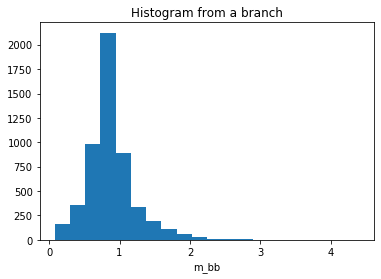

In [15]:
# Lets convert one branch into an array and plot it
m_bb = signal_tree.array('m_bb')
# m_bb will be a numpy array with the same type as the branch eg 8-byte floating
# which means a 64-bit floating-point number
print(m_bb.dtype)
# Double checking the size of the array:
print(m_bb.shape)
# We can even make a histogram with matplotlib
plt.hist(m_bb, bins=20)
plt.xlabel('m_bb')
plt.title('Histogram from a branch')
plt.show()